In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def do_lap(in_field, out_field, n_indent):
    out_field[n_indent:-n_indent, n_indent:-n_indent] = \
    -3.00 * in_field[n_indent:-n_indent, n_indent:-n_indent] \
    +0.50 * in_field[n_indent+1:-n_indent+1, n_indent  :-n_indent  ] \
    +0.50 * in_field[n_indent-1:-n_indent-1, n_indent  :-n_indent  ] \
    +0.50 * in_field[n_indent  :-n_indent  , n_indent+1:-n_indent+1] \
    +0.50 * in_field[n_indent  :-n_indent  , n_indent-1:-n_indent-1] \
    +0.25 * in_field[n_indent+1:-n_indent+1, n_indent+1:-n_indent+1] \
    +0.25 * in_field[n_indent-1:-n_indent-1, n_indent+1:-n_indent+1] \
    +0.25 * in_field[n_indent+1:-n_indent+1, n_indent-1:-n_indent-1] \
    +0.25 * in_field[n_indent-1:-n_indent-1, n_indent-1:-n_indent-1]
    
def do_filter(in_field, n_halo, order=2, n_iter=1, alpha=1.0):
    out_field = in_field.copy()
    alpha_eff = alpha * 0.5**order * (-1.0)**(order//2 + 1)
    tmp1 = in_field.copy()
    tmp2 = in_field.copy()
    if order == 2:
        for i in range(n_iter):
            do_lap(out_field, tmp1, n_indent=n_halo)
            out_field[n_halo:-n_halo, n_halo:-n_halo] += \
              alpha_eff * tmp1[n_halo:-n_halo, n_halo:-n_halo]
    elif order == 4:
        for i in range(n_iter):
            do_lap(out_field, tmp2, n_indent=n_halo-1)
            do_lap(tmp2, tmp1, n_indent=n_halo)
            out_field[n_halo:-n_halo, n_halo:-n_halo] += \
              alpha_eff * tmp1[n_halo:-n_halo, n_halo:-n_halo]
    elif order == 6:
        for i in range(n_iter):
            do_lap(out_field, tmp1, n_indent=n_halo-2)
            do_lap(tmp1, tmp2, n_indent=n_halo-1)
            do_lap(tmp2, tmp1, n_indent=n_halo)
            out_field[n_halo:-n_halo, n_halo:-n_halo] += \
              alpha_eff * tmp1[n_halo:-n_halo, n_halo:-n_halo]
    return out_field

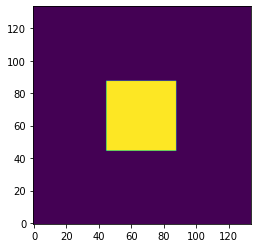

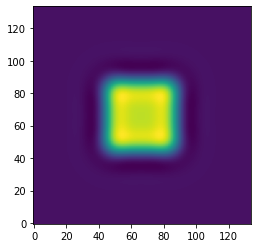

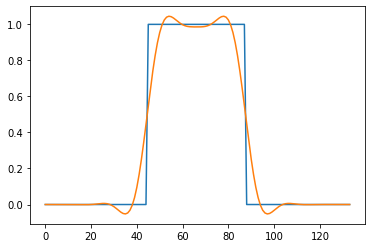

In [68]:
nx = 128
ny = 128
n_halo = 3
in_field = np.zeros( (ny+2*n_halo, nx+2*n_halo), dtype=float )
in_field[2*ny//6 + n_halo:4*nx//6 + n_halo, 2*nx//6 + n_halo:4*nx//6 + n_halo] = 1.0
plt.imshow(in_field, origin='lower');
plt.show()
out_field = do_filter(in_field, n_halo, order=4, n_iter=1000, alpha=1.0)
plt.imshow(out_field, origin='lower');
plt.show()
plt.plot(in_field[ny//2 + n_halo, :])
plt.plot(out_field[ny//2 + n_halo, :])
plt.show()